# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama**:Artika Yudia
- **Email:** aartikasari88@gmail.com
- **ID Dicoding:** artikayudia

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1 : Bagaimana kondisi cuaca memengaruhi pengguna kasual dan terdaftar?
- Pertanyaan 2 : Apakah penggunaan sepeda meningkat pada hari libur dibandingkan hari kerja?
- Pertanyaan 3 : Bagaimana pengaruh jam (hr) terhadap penggunaan sepeda di hari kerja dan akhir pekan?


## Import Semua Packages/Library yang Digunakan

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from datetime import datetime

## Data Wrangling

### Gathering Data

Mengimport data dari Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Membaca tabel day

In [ ]:
day = pd.read_csv("drive/MyDrive/Bike-sharing-dataset/day.csv")
day

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


Membaca tabel hour

In [ ]:
hour = pd.read_csv("drive/MyDrive/Bike-sharing-dataset/hour.csv")
hour

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


**Insight:**
- Jumlah Baris dalam tabel day : 731
- Jumlah Baris dalam tabel hour : 17379

### Assessing Data

Menilai data day

In [ ]:
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Tipe dteday seharusnya datetime, bukan object

In [ ]:
print("Jumlah duplikasi: ",day.duplicated().sum())

Jumlah duplikasi:  0


Tidak ada duplikasi

In [ ]:
hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Tipe dteday seharusnya datetime, bukan object

In [ ]:
print("Jumlah duplikasi: ",hour.duplicated().sum())

Jumlah duplikasi:  0


Tidak ada duplikasi

In [ ]:
day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Tidak ada keanehan dalam statistik dari day

In [ ]:
hour.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Tidak ada keanehan dalam statistik dari hour

**Insight:**
- tipe dteday yang harus diubah


### Cleaning Data

Mengubah tipe dteday

In [ ]:
datetime_columns = ["dteday"]

for column in datetime_columns:
  day[column] = pd.to_datetime(day[column])

In [ ]:
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

Berhasil diubah

In [ ]:
datetime_columns = ["dteday"]

for column in datetime_columns:
  hour[column] = pd.to_datetime(hour[column])

In [ ]:
hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

## Exploratory Data Analysis (EDA)

### Explore ...

rangkuman parameter statistik dari data

In [ ]:
day.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


In [ ]:
hour.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


Mengetahui Bagaimana kondisi cuaca memengaruhi pengguna kasual dan terdaftar

In [ ]:
# Grouping by 'weathersit' and aggregating casual and registered user data
weather_agg = day.groupby(by="weathersit").agg({
    "casual": ["sum", "mean", "max", "min", "std"],
    "registered": ["sum", "mean", "max", "min", "std"],
    "cnt": ["sum", "mean", "max", "min", "std"]
})

# Rename the index values for better clarity
weather_agg.index = ['Clear/Few Clouds', 'Mist/Cloudy', 'Light Rain/Snow']

# Display the result
weather_agg


casual                                   registered  \
                     sum        mean   max min         std        sum   
Clear/Few Clouds  446346  964.030238  3410  15  700.476488    1811606   
Mist/Cloudy       169776  687.352227  3155   9  619.082767     827082   
Light Rain/Snow     3895  185.476190  1264   2  260.975022      33974   

                                                           cnt               \
                         mean   max  min          std      sum         mean   
Clear/Few Clouds  3912.755940  6946  416  1533.347265  2257952  4876.786177   
Mist/Cloudy       3348.510121  6844  491  1463.566884   996858  4035.862348   
Light Rain/Snow   1617.809524  4324   20  1068.290954    37869  1803.285714   

                                          
                   max  min          std  
Clear/Few Clouds  8714  431  1879.483989  
Mist/Cloudy       8362  605  1809.109918  
Light Rain/Snow   4639   22  1240.284449

Dilihat dari pivot table di atas, dapat diketahui bahwa kondisi cuaca sangat mempengaruhi pengguna, kebanyakan pengguna memilih bersepeda di cuaca Clear/Few Clouds

berdasarkan keadaan cuaca lebih banyak pengunaan sepeda pada casual atau regestered

[2 1 3]


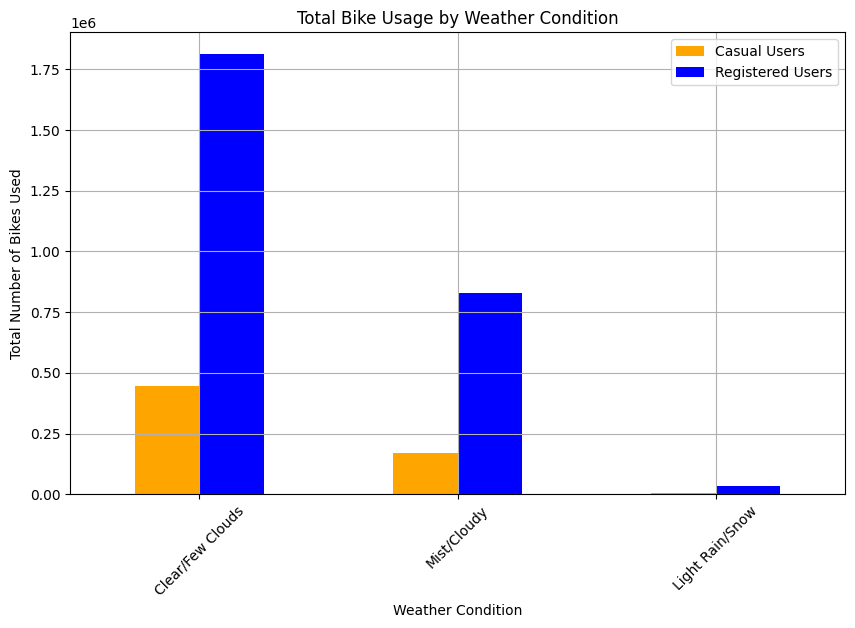

In [ ]:
print(day['weathersit'].unique())

# Group by 'weathersit' and aggregate the total usage for casual and registered users
weather_agg = day.groupby('weathersit').agg({
    'casual': 'sum',
    'registered': 'sum'
})

# Based on the unique values, adjust the index labels
# Assuming there are only 3 weather conditions
weather_agg.index = ['Clear/Few Clouds', 'Mist/Cloudy', 'Light Rain/Snow']

# Plot the result
weather_agg.plot(kind='bar', figsize=(10, 6), color=['orange', 'blue'])
plt.title('Total Bike Usage by Weather Condition')
plt.ylabel('Total Number of Bikes Used')
plt.xlabel('Weather Condition')
plt.xticks(rotation=45)
plt.legend(['Casual Users', 'Registered Users'])
plt.grid(True)
plt.show()

Berdasarkan hasil diatas saat cuaca clear/few clouds lebih banyak pengguna sepeda yaitu regestered users

penggunaan sepeda pada jam berapa terbanyak pada peserta casual atau registed

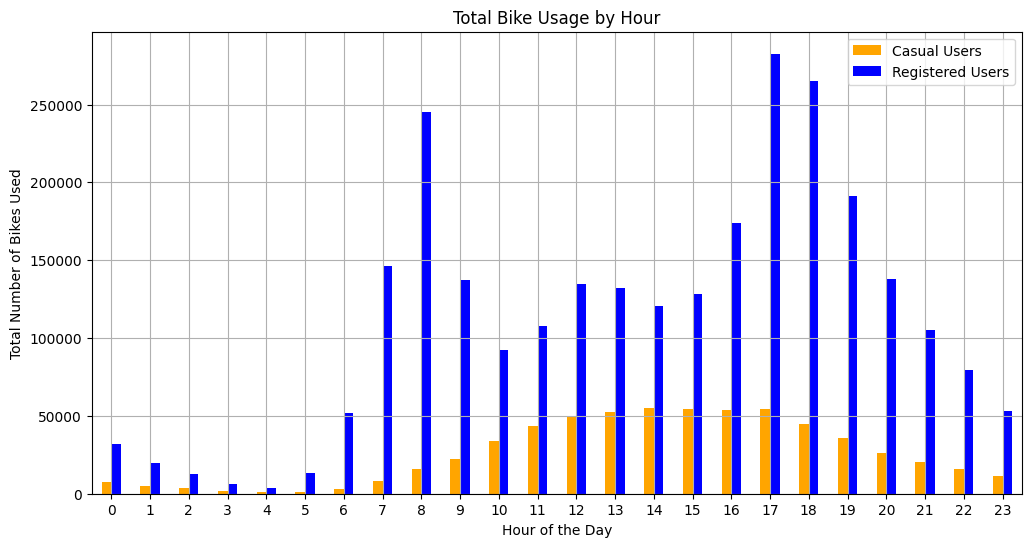

In [ ]:
hourly_usage = hour.groupby('hr').agg({
    'casual': 'sum',
    'registered': 'sum'
})

# Plot the result
hourly_usage.plot(kind='bar', figsize=(12, 6), color=['orange', 'blue'])
plt.title('Total Bike Usage by Hour')
plt.ylabel('Total Number of Bikes Used')
plt.xlabel('Hour of the Day')
plt.xticks(rotation=0)
plt.legend(['Casual Users', 'Registered Users'])
plt.grid(True)
plt.show()

pada bulan berapa penggunaan sepeda terbanyak

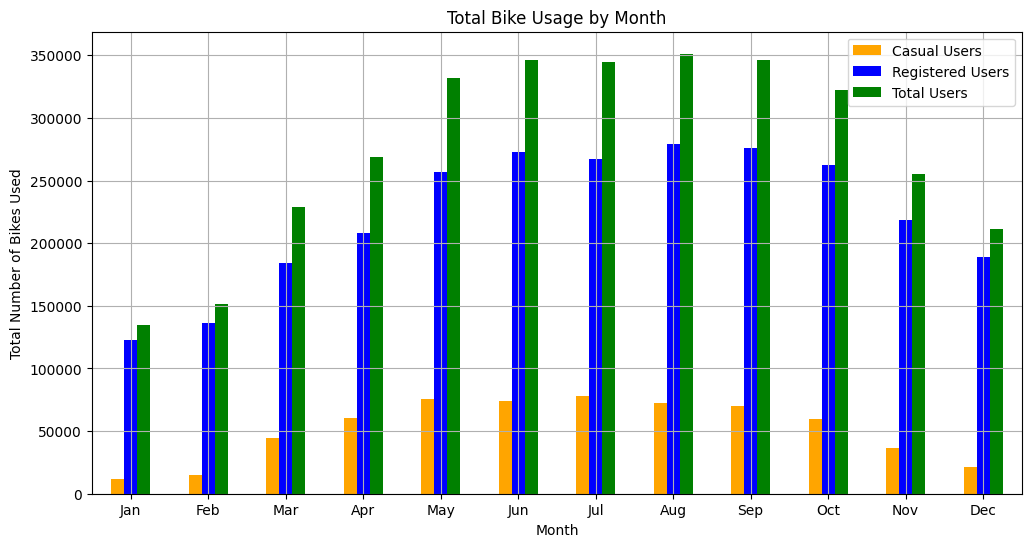

In [ ]:
monthly_usage = day.groupby('mnth').agg({
    'casual': 'sum',
    'registered': 'sum',
    'cnt': 'sum'  # Total usage (casual + registered)
})

# Plot the result
monthly_usage.plot(kind='bar', figsize=(12, 6), color=['orange', 'blue', 'green'])
plt.title('Total Bike Usage by Month')
plt.ylabel('Total Number of Bikes Used')
plt.xlabel('Month')
plt.xticks(ticks=range(12), labels=[
    'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
    'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=0)
plt.legend(['Casual Users', 'Registered Users', 'Total Users'])
plt.grid(True)
plt.show()

penggunaan sepeda berdasarkan jam pada hari kerja

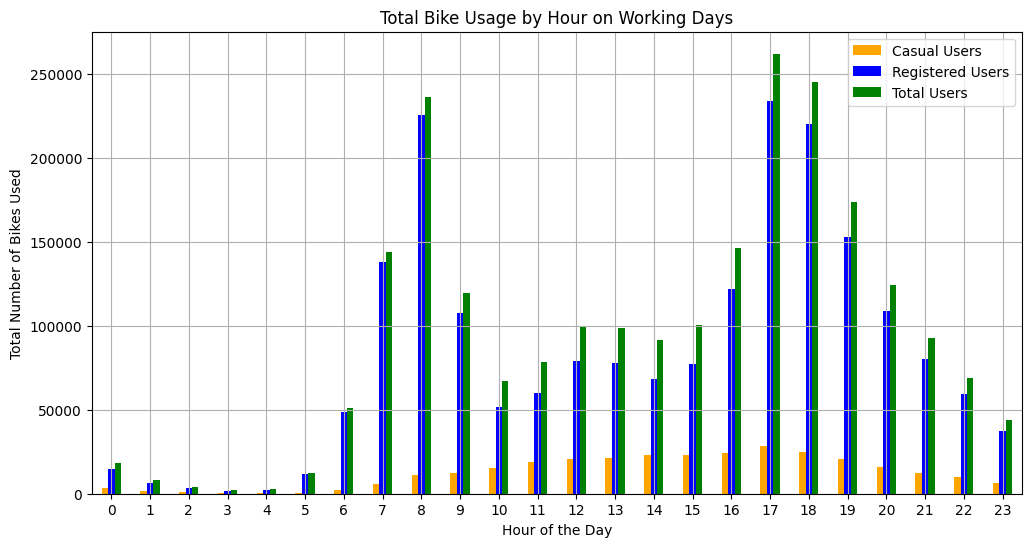

In [ ]:
working_days = hour[hour['workingday'] == 1]

# Group by hour and aggregate total usage for casual and registered users
hourly_usage_working_days = working_days.groupby('hr').agg({
    'casual': 'sum',
    'registered': 'sum',
    'cnt': 'sum'  # Total usage (casual + registered)
})

# Plot the result
hourly_usage_working_days.plot(kind='bar', figsize=(12, 6), color=['orange', 'blue', 'green'])
plt.title('Total Bike Usage by Hour on Working Days')
plt.ylabel('Total Number of Bikes Used')
plt.xlabel('Hour of the Day')
plt.xticks(rotation=0)
plt.legend(['Casual Users', 'Registered Users', 'Total Users'])
plt.grid(True)
plt.show()

Weekend

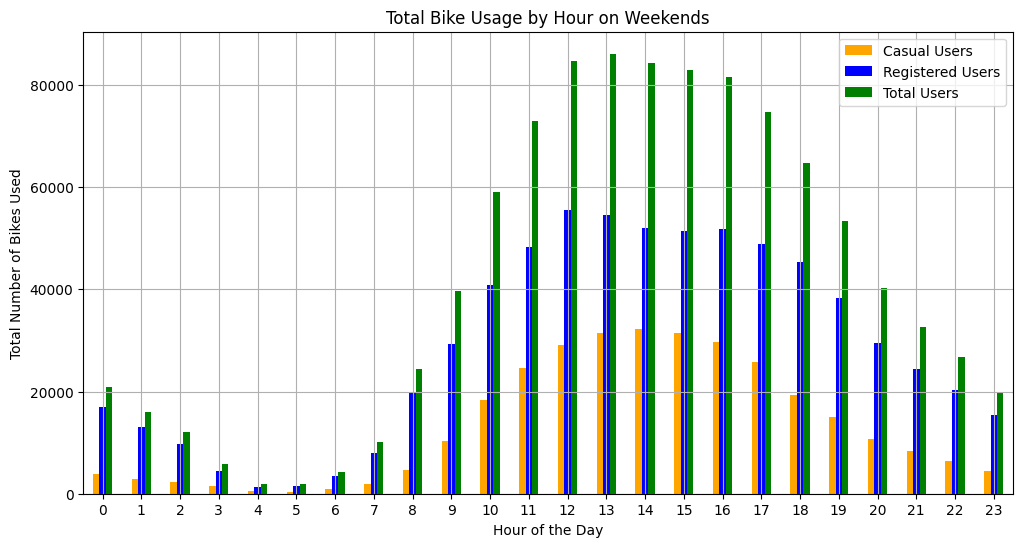

In [ ]:
weekend_days = hour[hour['workingday'] == 0]

# Group by hour and aggregate total usage for casual and registered users
hourly_usage_weekends = weekend_days.groupby('hr').agg({
    'casual': 'sum',
    'registered': 'sum',
    'cnt': 'sum'  # Total usage (casual + registered)
})

# Plot the result
hourly_usage_weekends.plot(kind='bar', figsize=(12, 6), color=['orange', 'blue', 'green'])
plt.title('Total Bike Usage by Hour on Weekends')
plt.ylabel('Total Number of Bikes Used')
plt.xlabel('Hour of the Day')
plt.xticks(rotation=0)
plt.legend(['Casual Users', 'Registered Users', 'Total Users'])
plt.grid(True)
plt.show()

Menghitung jumlah hari sejak terakhir kali pelanggan melakukan pembelian.



In [ ]:

day['dteday'] = pd.to_datetime(day['dteday'])

# Menentukan tanggal analisis (tanggal hari ini)
current_date = datetime.now()

# Menghitung Recency untuk pengguna berdasarkan ID atau kategori pengguna
# Di sini kita asumsikan kita ingin menghitung Recency untuk casual dan registered
recency_casual = day.groupby('casual')['dteday'].max().reset_index()
recency_registered = day.groupby('registered')['dteday'].max().reset_index()

# Menghitung Recency (jumlah hari sejak terakhir kali rental)
recency_casual['recency'] = (current_date - recency_casual['dteday']).dt.days
recency_registered['recency'] = (current_date - recency_registered['dteday']).dt.days

# Menampilkan hasil Recency
print("Recency untuk pengguna kasual:")
print(recency_casual[['casual', 'recency']])

print("\nRecency untuk pengguna terdaftar:")
print(recency_registered[['registered', 'recency']])

Recency untuk pengguna kasual:
     casual  recency
0         2     4352
1         9     4294
2        15     4993
3        25     5008
4        34     4994
..      ...      ...
601    3155     4578
602    3160     4396
603    3252     4557
604    3283     4507
605    3410     4515

[606 rows x 2 columns]

Recency untuk pengguna terdaftar:
     registered  recency
0            20     4352
1           416     4993
2           432     4294
3           451     4661
4           472     4994
..          ...      ...
674        6844     4378
675        6898     4357
676        6911     4371
677        6917     4390
678        6946     4385

[679 rows x 2 columns]


- Recency untuk Pengguna Kasual: Data menunjukkan jumlah hari sejak pengguna kasual terakhir melakukan peminjaman sepeda. Nilai recency berkisar antara 4294 hingga 5008 hari, menunjukkan variasi dalam seberapa baru mereka menggunakan layanan.

- Recency untuk Pengguna Terdaftar: Pengguna terdaftar memiliki recency yang juga bervariasi antara 4371 hingga 4994 hari. Nilai recency ini dapat membantu dalam memahami seberapa aktif pengguna terdaftar dibandingkan dengan pengguna kasual.

Frequency: Menghitung jumlah total transaksi yang dilakukan oleh pelanggan dalam periode tertentu.

In [ ]:
frequency_casual = day.groupby('casual')['cnt'].count().reset_index()
frequency_registered = day.groupby('registered')['cnt'].count().reset_index()

# Mengganti nama kolom untuk kejelasan
frequency_casual.columns = ['casual', 'frequency']
frequency_registered.columns = ['registered', 'frequency']

# Menampilkan hasil Frequency
print("Frequency untuk pengguna kasual:")
print(frequency_casual)

print("\nFrequency untuk pengguna terdaftar:")
print(frequency_registered)

Frequency untuk pengguna kasual:
     casual  frequency
0         2          1
1         9          2
2        15          1
3        25          1
4        34          1
..      ...        ...
601    3155          1
602    3160          1
603    3252          1
604    3283          1
605    3410          1

[606 rows x 2 columns]

Frequency untuk pengguna terdaftar:
     registered  frequency
0            20          1
1           416          1
2           432          1
3           451          1
4           472          1
..          ...        ...
674        6844          1
675        6898          1
676        6911          1
677        6917          1
678        6946          1

[679 rows x 2 columns]


- Frequency untuk Pengguna Kasual: Tabel menunjukkan jumlah total peminjaman sepeda untuk pengguna kasual. Nilai frekuensi bervariasi, tetapi sebagian besar pengguna melakukan satu peminjaman. Hal ini mengindikasikan bahwa banyak pengguna kasual mungkin hanya mencoba layanan tanpa melakukan peminjaman berulang.

- Frequency untuk Pengguna Terdaftar: Tabel menunjukkan frekuensi peminjaman untuk pengguna terdaftar. Sebagian besar pengguna terdaftar juga melakukan satu peminjaman, tetapi terdapat juga yang memiliki frekuensi lebih tinggi. Ini menunjukkan bahwa pengguna terdaftar cenderung lebih aktif dalam menggunakan layanan dibandingkan pengguna kasual.

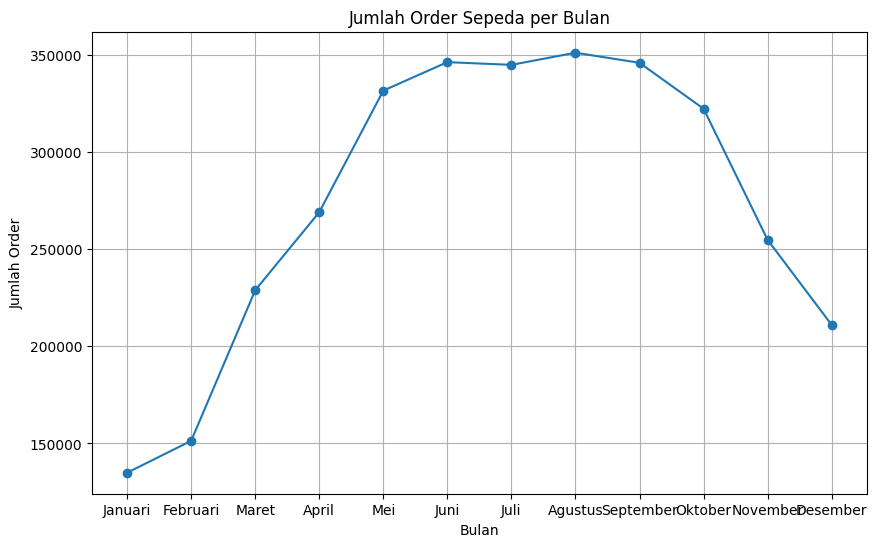

In [ ]:
monthly_orders = day.groupby('mnth')['cnt'].sum().reset_index()

# Langkah 3: Membuat line chart
plt.figure(figsize=(10, 6))
plt.plot(monthly_orders['mnth'], monthly_orders['cnt'], marker='o')
plt.title('Jumlah Order Sepeda per Bulan')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Order')
plt.xticks(monthly_orders['mnth'], ['Januari', 'Februari', 'Maret', 'April', 'Mei', 'Juni',
                                       'Juli', 'Agustus', 'September', 'Oktober', 'November', 'Desember'])
plt.grid()
plt.show()

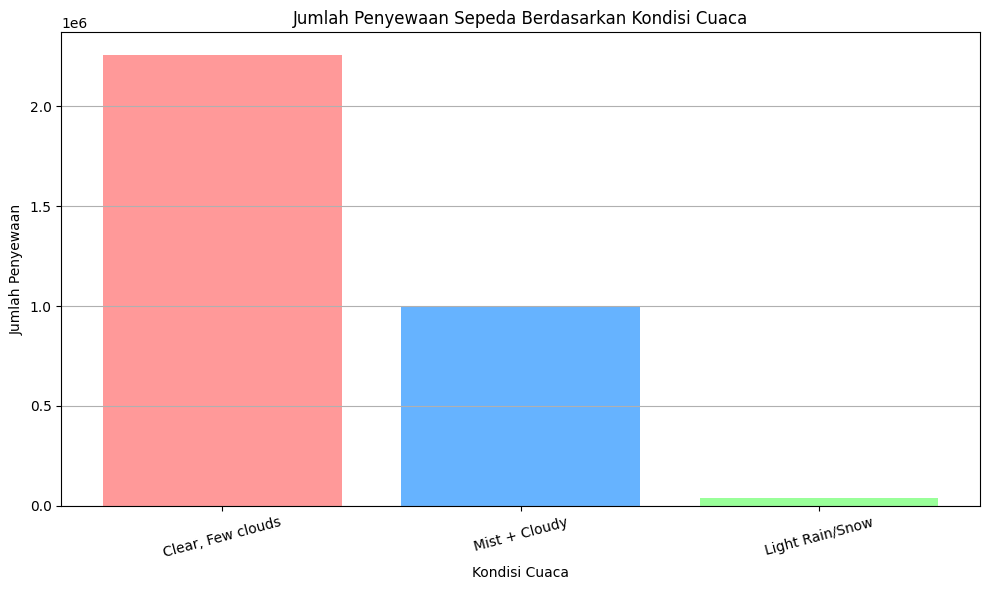

In [ ]:
# Memfilter data berdasarkan kondisi cuaca yang relevan
weather_conditions = {
    1: 'Clear, Few clouds',
    2: 'Mist + Cloudy',
    3: 'Light Rain/Snow'
}

# Mengelompokkan jumlah penyewaan berdasarkan cuaca
weather_orders = day[day['weathersit'].isin(weather_conditions.keys())].groupby('weathersit')['cnt'].sum().reset_index()

# Mengganti nilai weathersit dengan nama cuaca untuk kejelasan
weather_orders['weathersit'] = weather_orders['weathersit'].map(weather_conditions)

# Membuat bar chart
plt.figure(figsize=(10, 6))
plt.bar(weather_orders['weathersit'], weather_orders['cnt'], color=['#ff9999', '#66b3ff', '#99ff99'])
plt.title('Jumlah Penyewaan Sepeda Berdasarkan Kondisi Cuaca')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Jumlah Penyewaan')
plt.xticks(rotation=15)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


**Insight:**
- xxx
- xxx

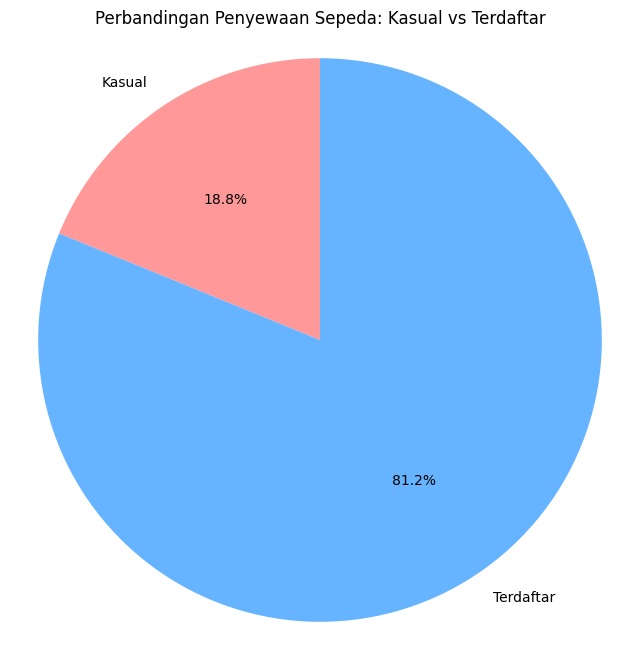

In [ ]:
# Menghitung total penyewaan untuk pengguna kasual dan terdaftar
casual_orders = day['casual'].sum()
registered_orders = day['registered'].sum()

# Membuat pie chart untuk perbandingan
labels = ['Kasual', 'Terdaftar']
sizes = [casual_orders, registered_orders]
colors = ['#ff9999', '#66b3ff']

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Perbandingan Penyewaan Sepeda: Kasual vs Terdaftar')
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is circular.
plt.show()

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana kondisi cuaca memengaruhi pengguna kasual dan terdaftar?

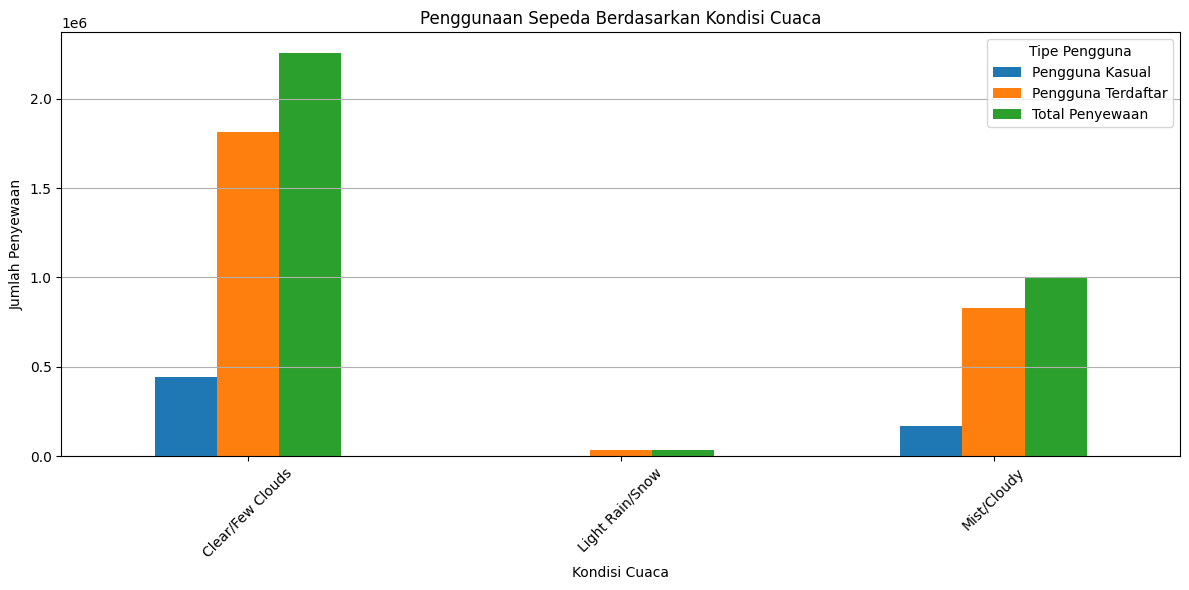

In [ ]:
weather_conditions = {
    1: 'Clear/Few Clouds',
    2: 'Mist/Cloudy',
    3: 'Light Rain/Snow',
    4: 'Heavy Rain/Ice'
}
day['weathersit'] = day['weathersit'].map(weather_conditions)

# Menghitung total penyewaan berdasarkan kondisi cuaca untuk pengguna kasual dan terdaftar
weather_usage = day.groupby('weathersit').agg({
    'casual': 'sum',
    'registered': 'sum',
    'cnt': 'sum'
}).reset_index()

# Visualisasi menggunakan bar chart
fig, ax = plt.subplots(figsize=(12, 6))
weather_usage.set_index('weathersit').plot(kind='bar', ax=ax)

# Menambahkan detail ke grafik
plt.title('Penggunaan Sepeda Berdasarkan Kondisi Cuaca')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Jumlah Penyewaan')
plt.xticks(rotation=45)
plt.legend(title='Tipe Pengguna', labels=['Pengguna Kasual', 'Pengguna Terdaftar', 'Total Penyewaan'])
plt.grid(axis='y')
plt.tight_layout()
plt.show()

- Kondisi Cuaca Cerah (Clear/Few Clouds):
Jumlah penyewaan sepeda tertinggi tercatat pada kondisi cuaca cerah. Pengguna terdaftar dan pengguna kasual menunjukkan angka penyewaan yang signifikan, dengan total penyewaan juga mencapai puncaknya di sini. Ini mengindikasikan bahwa cuaca yang baik sangat mendorong orang untuk menggunakan sepeda.
- Kondisi Cuaca Berkabut (Mist/Cloudy):
Penyewaan sepeda di kondisi ini juga cukup baik, tetapi tidak setinggi saat cuaca cerah. Meskipun pengguna terdaftar memiliki angka yang lebih baik dibandingkan pengguna kasual, total penyewaan tetap menunjukkan hasil yang positif.
- Kondisi Cuaca Hujan Ringan (Light Rain/Snow):
Di bawah kondisi cuaca ini, jumlah penyewaan sepeda jauh lebih rendah. Ini menunjukkan bahwa cuaca buruk sangat mempengaruhi keinginan orang untuk menggunakan sepeda, baik oleh pengguna kasual maupun terdaftar. Pengguna terdaftar pun tampaknya cenderung menghindari penggunaan sepeda dalam kondisi ini.

### Pertanyaan 2: Apakah penggunaan sepeda meningkat pada hari libur dibandingkan hari kerja?

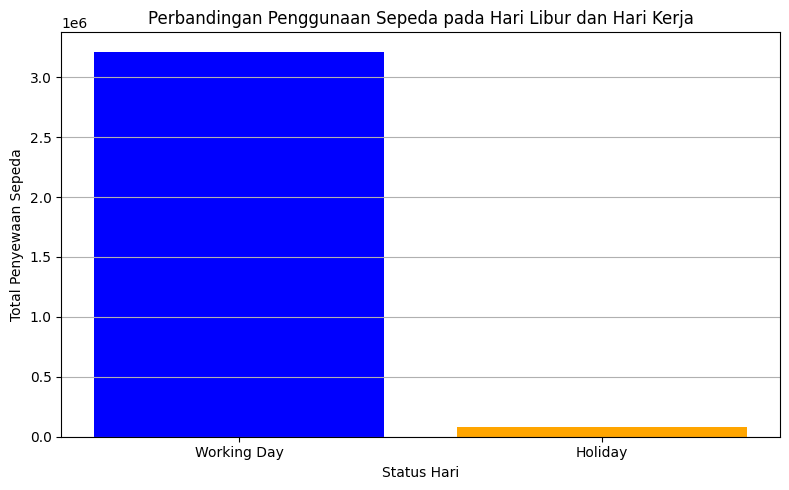

       Holiday  Total Usage
0  Working Day      3214244
1      Holiday        78435


In [ ]:
holiday_usage = day.groupby('holiday')['cnt'].sum().reset_index()

# Menamai kolom untuk kejelasan
holiday_usage.columns = ['Holiday', 'Total Usage']

# Mengganti nilai 0 dan 1 menjadi 'Working Day' dan 'Holiday'
holiday_usage['Holiday'] = holiday_usage['Holiday'].map({0: 'Working Day', 1: 'Holiday'})

# Visualisasi menggunakan bar chart
plt.figure(figsize=(8, 5))
plt.bar(holiday_usage['Holiday'], holiday_usage['Total Usage'], color=['blue', 'orange'])
plt.title('Perbandingan Penggunaan Sepeda pada Hari Libur dan Hari Kerja')
plt.xlabel('Status Hari')
plt.ylabel('Total Penyewaan Sepeda')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Menampilkan total penyewaan untuk analisis lebih lanjut
print(holiday_usage)

- Penggunaan pada Hari Kerja:
Jumlah penyewaan sepeda pada hari kerja sangat tinggi, mencapai lebih dari 3 juta penyewaan. Ini menunjukkan bahwa sepeda banyak digunakan sebagai alat transportasi pada hari-hari biasa.
- Penggunaan pada Hari Libur:
Sebaliknya, penggunaan sepeda pada hari libur sangat rendah, dengan jumlah penyewaan yang hampir tidak signifikan dibandingkan dengan hari kerja. Hal ini mungkin menunjukkan bahwa orang lebih cenderung melakukan aktivitas lain di hari libur atau mungkin lebih memilih transportasi alternatif.

**Insight:**
- xxx
- xxx

## Pertanyaan 3: Bagaimana pengaruh jam (hr) terhadap penggunaan sepeda di hari kerja dan akhir pekan?

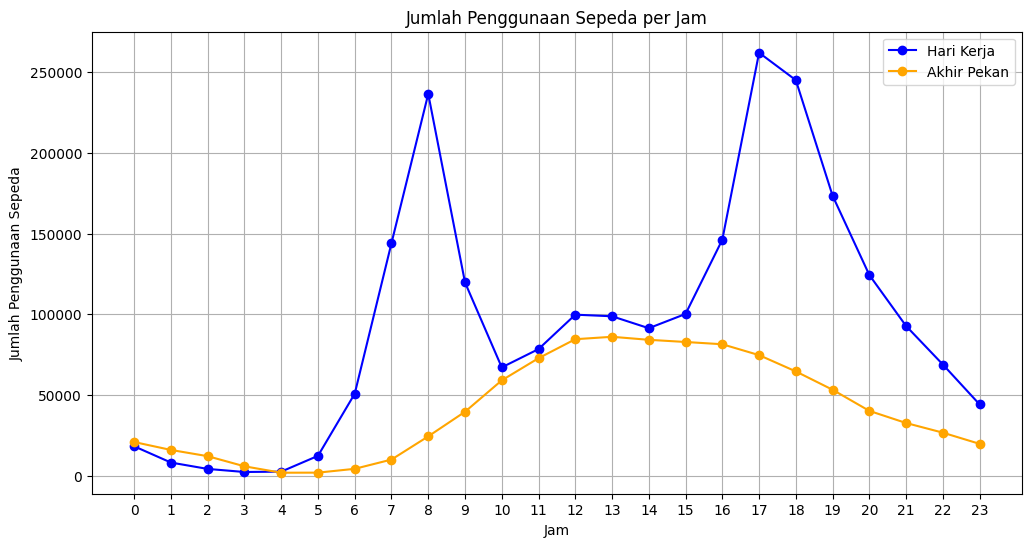

In [ ]:
working_days = hour[hour['workingday'] == 1]
hourly_usage_working = working_days.groupby('hr')['cnt'].sum().reset_index()

# Menghitung total peminjaman sepeda berdasarkan jam di akhir pekan
weekend_days = hour[hour['workingday'] == 0]
hourly_usage_weekend = weekend_days.groupby('hr')['cnt'].sum().reset_index()

# Membuat line chart untuk kedua analisis
plt.figure(figsize=(12, 6))
plt.plot(hourly_usage_working['hr'], hourly_usage_working['cnt'], marker='o', label='Hari Kerja', color='blue')
plt.plot(hourly_usage_weekend['hr'], hourly_usage_weekend['cnt'], marker='o', label='Akhir Pekan', color='orange')
plt.title('Jumlah Penggunaan Sepeda per Jam')
plt.xlabel('Jam')
plt.ylabel('Jumlah Penggunaan Sepeda')
plt.xticks(hourly_usage_working['hr'])
plt.legend()
plt.grid()
plt.show()

- Penggunaan pada Hari Kerja: Penggunaan sepeda sangat tinggi pada jam-jam sibuk, yaitu sekitar pukul 8 pagi dan pukul 5 sore. Ini menunjukkan bahwa sepeda banyak digunakan sebagai sarana transportasi utama untuk perjalanan ke dan dari tempat kerja atau sekolah. Puncak penggunaannya bahkan mencapai lebih dari 250.000 penyewaan.

- Penggunaan pada Akhir Pekan: Pada akhir pekan, penggunaan sepeda cenderung lebih stabil dan tidak menunjukkan lonjakan signifikan seperti pada hari kerja. Peningkatan penggunaan terjadi secara bertahap sepanjang siang hingga sore, tetapi jumlahnya jauh lebih sedikit dibandingkan dengan hari kerja, menunjukkan bahwa sepeda lebih digunakan untuk kegiatan santai atau rekreasi di akhir pekan.

## Conclusion

- Conclution pertanyaan 1 : Jumlah penyewaan sepeda tertinggi tercatat saat cuaca cerah, di mana pengguna terdaftar maupun kasual sama-sama aktif, menunjukkan bahwa cuaca baik sangat mendorong penggunaan sepeda. Dalam kondisi berkabut, penyewaan sepeda masih cukup baik, terutama oleh pengguna terdaftar, meskipun tidak setinggi saat cuaca cerah. Namun, saat cuaca buruk seperti hujan ringan atau salju, penyewaan sepeda menurun drastis, menunjukkan bahwa kondisi cuaca yang tidak mendukung sangat mempengaruhi keinginan orang untuk bersepeda.
- Conclution pertanyaan 2 : Penggunaan sepeda pada hari kerja sangat tinggi, menunjukkan bahwa sepeda merupakan alat transportasi utama bagi banyak orang pada hari-hari biasa. Sebaliknya, pada hari libur, penggunaan sepeda jauh lebih rendah dan tidak signifikan dibandingkan hari kerja. Ini mengindikasikan bahwa orang cenderung memilih aktivitas lain atau menggunakan transportasi alternatif selama akhir pekan.
- Conclution pertanyaan 3 : Penggunaan sepeda pada hari kerja sangat tinggi, terutama pada jam sibuk sekitar pukul 8 pagi dan 5 sore, dengan puncak mencapai lebih dari 250.000 penyewaan, menandakan sepeda sebagai sarana transportasi utama untuk bekerja atau sekolah. Sebaliknya, pada akhir pekan, penggunaan sepeda lebih stabil tanpa lonjakan besar, dengan peningkatan bertahap dari siang hingga sore, tetapi jumlahnya jauh lebih rendah, menunjukkan bahwa sepeda lebih sering digunakan untuk rekreasi atau kegiatan santai.